## Name: Samrudha Ganvir


# TASK - 2
# PREDICTION USING UNSUPERVISED ML


We are given a dataset about Iris ( a flower ) consisting of four features -
Sepal length, Sepal width, Petal length and Petal width. 

We need to find the optimum number of clusters for this dataset and represent it visually. 



In [ ]:
#Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

print('Libraries imported')

Libraries imported


#### READING THE DATA

In [ ]:
iris = datasets.load_iris()
iris_dataset = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### PLOTTING THE DATASET

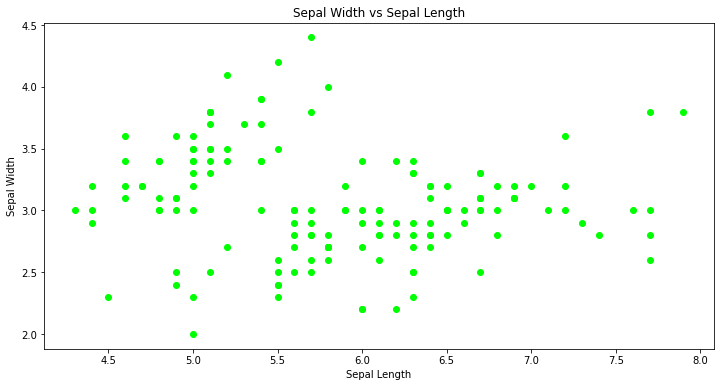

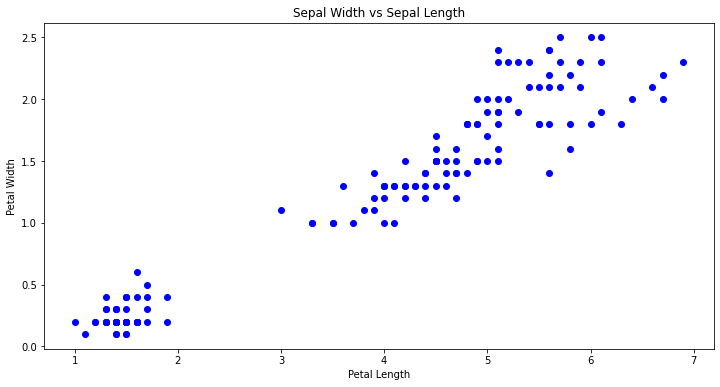

In [ ]:
x = np.asarray(iris_dataset)[:,:]

plt.figure(figsize=(12,6))
plt.plot(x[:,0], x[:,1],'o', color="#00ff00")
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(x[:,2], x[:,3], 'o',  color="#0000ff")
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


#### ELBOW METHOD FOR DETERMINING THE NUMBER OF CLUSTERS

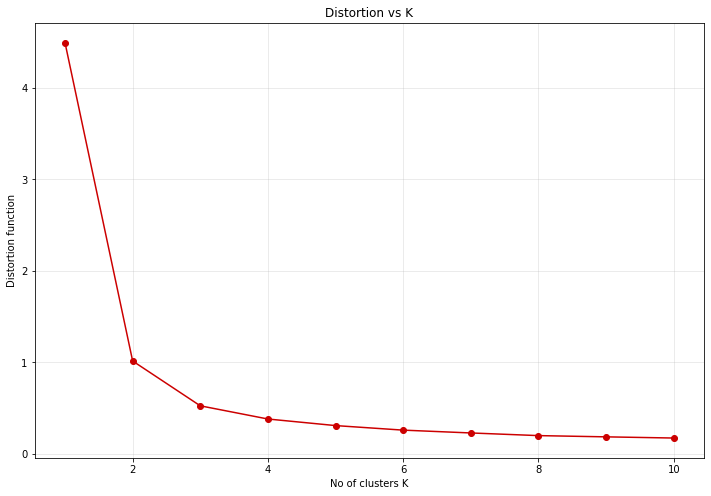

In [ ]:
from sklearn.cluster import KMeans

dis = np.empty([1,10] , dtype="float64")

for K in range(1,11):
    model = KMeans(K, max_iter=50, random_state=42)
    model.fit(x)
    z = model.cluster_centers_
    y_pred = model.predict(x)
    distortion = 0.0
    for i in range(1,150):
      distortion += ( z[y_pred[i], :] - x[i,:] ) **2 
    
    dis[0,K-1] = distortion.sum()/150.0

K = np.array( [ [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ])

# Plotting the Distortion vs K graph
plt.figure(figsize=(12,8))
plt.plot(K[0,:], dis[0,:], '-o', color = '#cc0000')
plt.grid(alpha=0.3)
plt.xlabel('No of clusters K')
plt.ylabel('Distortion function')
plt.title('Distortion vs K')
plt.show()

The graph resembles an elbow where the elbow is that point after which the distortion function does not change significantly.

It is clear that for K > 3, there is no significant change in the distortion function. Therefore we choose **3** as the number of clusters.

#### APPLYING K-MEANS CLUSTERING

In [ ]:
K = 3
min = 100
for j in range(0,100):
  model = KMeans(K, max_iter=100, random_state=42)
  model.fit(x)
  cluster_center = model.cluster_centers_
  y_predict = model.predict(x)

print('K-means done')

K-means done


#### VISUALIZING THE CLUSTERS

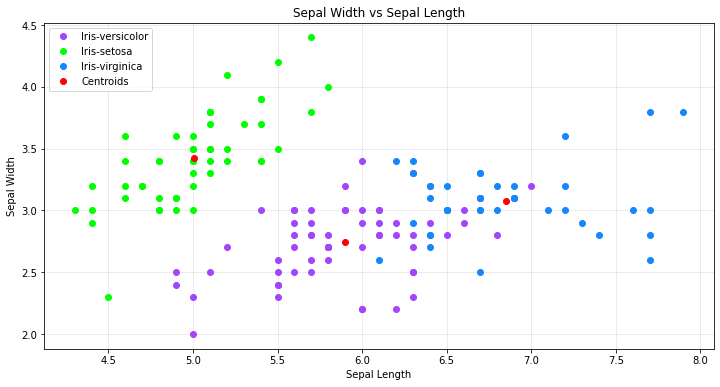

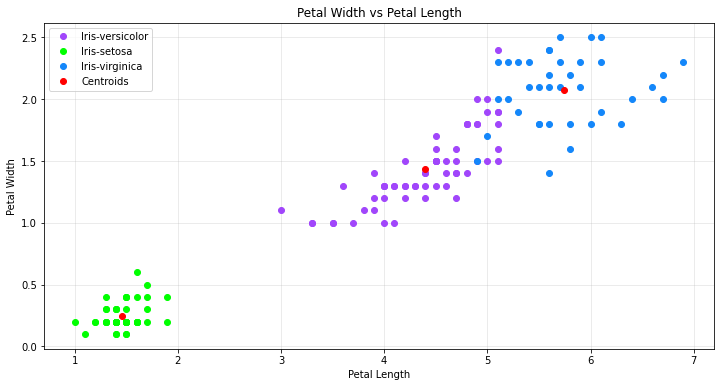

In [ ]:
x_0 = []
x_1 = []
x_2 = []
for i in range(0,150):
  if y_predict[i] == 0:
    x_0.append(x[i])
  elif y_predict[i] == 1:
    x_1.append(x[i])
  else:
    x_2.append(x[i])

x_0 = np.array(x_0)
x_1 = np.array(x_1)
x_2 = np.array(x_2)

#Visualizing the clusters on the first two features - Sepal Length and Sepal Width 
plt.figure(figsize=(12,6))
plt.plot(x_0[:,0], x_0[:,1], 'o', color="#a146fb", label = 'Iris-versicolor')
plt.plot(x_1[:,0], x_1[:,1], 'o', color="#00ff00", label = 'Iris-setosa')
plt.plot(x_2[:,0], x_2[:,1], 'o', color="#1487FA", label = 'Iris-virginica')

#Plotting the centroids' first two features
plt.plot( cluster_center[:,0] , cluster_center[:,1], 'o', color="#ff0000", label = 'Centroids')

plt.grid(alpha=0.3)
plt.legend(loc=2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs Sepal Length')
plt.show()

#Visualizing the clusters on the last two features - Petal Length and Petal Width 
plt.figure(figsize=(12,6))
plt.plot(x_0[:,2], x_0[:,3], 'o', color="#a146fb", label = 'Iris-versicolor')
plt.plot(x_1[:,2], x_1[:,3], 'o', color="#00ff00", label = 'Iris-setosa')
plt.plot(x_2[:,2], x_2[:,3], 'o', color="#1487FA", label = 'Iris-virginica')

#Plotting the centroids' last two features
plt.plot( cluster_center[:,2] , cluster_center[:,3], 'o', color="#ff0000", label = 'Centroids')

plt.grid(alpha=0.3)
plt.legend(loc=2)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Width vs Petal Length')
plt.show()